The titanic data to predict the survival of the passengers has been used. The dataset for this project is taken from https://www.kaggle.com/.

#### Variables: 	
- Survived - If a passenger survived or not 0 - Not, 1 - Yes;
- PClass - passenger class, 1- upper, 2 - middle, 3rd - lower;
- Name - name and surname;
- Sex - gender, ‘male’ - man, ‘female’- woman;
- Age - age of passengers;
- SibSp - number of siblings and spouses;
- Parch - number of parents and children;
- Fare - ticket fee;
- Cabin - number of cabin;
- Embarked - source port (C - Cherbourk, Q - Quenstown, S - Southampton).


### Import and preprocess data

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Quality measures
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Visualization of decision trees
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [2]:
titanic = pd.read_csv('C:\\Python Scripts\\Datasets\\titanic\\train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Missing data:

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the above cell Age, Cabin and Embarked have missing values.

### Data Exploration/Analysis
##### Filtering

Examples of selecting rows:

In [8]:
titanic[["Age","Pclass"]][5:20]

,Age,Pclass
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2
10,4.0,3
11,58.0,1
12,20.0,3
13,39.0,3
14,14.0,3


Filtering by column:

In [9]:
titanic[(titanic['Age'] >9.0) & (titanic['Age'] < 11.0 ) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.90,NaN,S


Histogram of the distribution of people survivors:

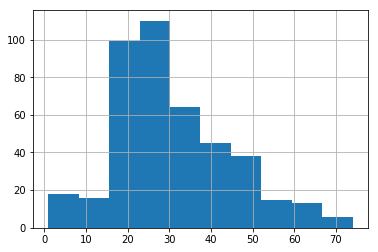

In [10]:
titanic[titanic["Survived"] == 0]["Age"].hist()

Histogram of the distribution of people who did not survive:

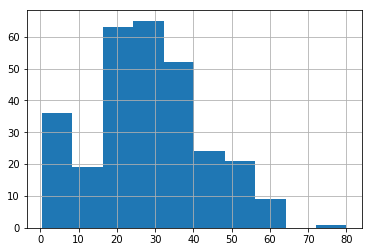

In [11]:
titanic[titanic["Survived"] == 1]["Age"].hist()

##### Grouping:

In [12]:
titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


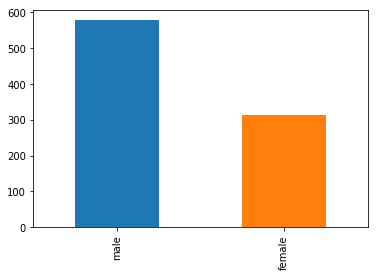

In [13]:
titanic.Sex.value_counts().plot(kind='bar')
plt.show()

How many people survived by class?

In [14]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,136
2,3,119
1,2,87


How many people survived by gender?

In [15]:
titanic.groupby(['Pclass','Sex'])['Survived'].sum()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [16]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


In [17]:
titanic[["Parch", "Survived"]].groupby(['Parch'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,Parch,Survived
0,0,233
1,1,65
2,2,40
3,3,3
5,5,1
4,4,0
6,6,0


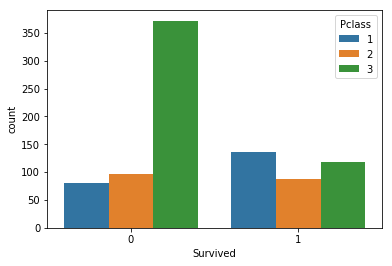

In [18]:
sns.countplot(x='Survived', data=titanic, hue='Pclass')

#### Boxplot

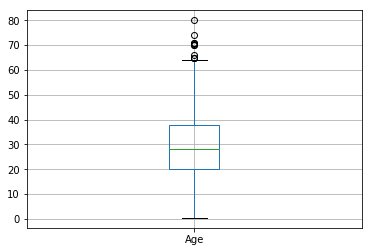

In [19]:
titanic.boxplot(column='Age')

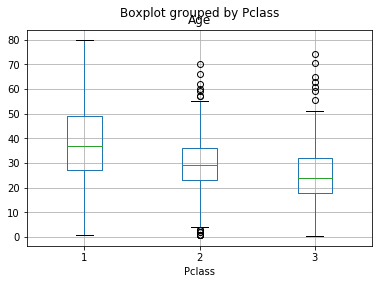

In [20]:
titanic.boxplot(column='Age',by='Pclass')

### Feature Engineering 
Creating new categories:

We add two new features (Title and FamilySize) to the dataset, that we compute out of other features.

In [21]:
tit = r",\s([^ .]+)\.?\s+"

titanic['Title'] =  titanic['Name'].str.extract(tit,expand=True)[0]
titanic.groupby('Title')['Title'].count()

Title
Capt          1
Col           2
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
the           1
Name: Title, dtype: int64

In [22]:
titanic.loc[titanic['Title'].isin(['Mlle','Ms','Lady']),'Title'] = 'Miss'
titanic.loc[titanic['Title'].isin(['Mme']),'Title'] = 'Mrs'
titanic.loc[titanic['Title'].isin(['Sir']),'Title'] = 'Mr'
titanic.loc[~titanic['Title'].isin(['Miss','Master','Mr','Mrs']),'Title'] = 'Other' # NOT IN

titanic['Title'] = pd.Categorical(titanic.Title).codes
titanic.groupby('Title')['Title'].count()

Title
0     40
1    186
2    518
3    126
4     21
Name: Title, dtype: int64

In [23]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

### Final Data Preparation for Machine Learning model

#### Categorization

Change of text variables to categorical ones:

In [24]:
titanic['Sex'] = pd.Categorical(titanic.Sex).codes

We change to the most common value:

In [25]:
titanic["Embarked"] = titanic["Embarked"].fillna('S')  

embarked = {'C':0,'Q':1,'S':2}
titanic['Embarked'] = titanic['Embarked'].map(embarked)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,0


#### Fill in missing values

Drop variables that are missing too much information or insignificant rows:

In [27]:
titanic = titanic.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

In [28]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2,1
1,1,1,0,38.0,1,0,71.2833,0,3,1
2,1,3,0,26.0,0,0,7.9250,2,1,0
3,1,1,0,35.0,1,0,53.1000,2,3,1
4,0,3,1,35.0,0,0,8.0500,2,2,0


In [29]:
titanic.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
FamilySize      0
dtype: int64

Completing missing data based on average:

In [30]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
titanic['Age'] = imp.fit_transform(titanic[['Age']])


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

#### Normalization

Almost all columns except Fare are category columns. Fare should be scaled before calculations so that it does not affect the model too much.

In [32]:
titanic['Fare'] = preprocessing.scale(titanic[['Fare']]) [:,0]

In [33]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,-0.502445,2,2,1
1,1,1,0,38.0,1,0,0.786845,0,3,1
2,1,3,0,26.0,0,0,-0.488854,2,1,0
3,1,1,0,35.0,1,0,0.420730,2,3,1
4,0,3,1,35.0,0,0,-0.486337,2,2,0


### Building ML model

In [34]:
X = titanic.drop(columns="Survived") 
y = titanic.loc[:, "Survived"]     

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)  

print("Training set:", train_X.shape, train_y.shape)
print("Test set:", test_X.shape, test_y.shape)

Training set: (712, 9) (712,)
Test set: (179, 9) (179,)


#### Decision tree

In [36]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
predicted_y = tree.predict(test_X)
predicted_y

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [83]:
precision = precision_score(test_y, predicted_y, average="micro")
print("Precision: {:.2f}".format(precision))

Precision: 0.79


In [86]:
# clear vizualization:
titanic_feature_names = X.columns

titanic_class_names = y.unique()

print("Features:", titanic_feature_names)
print("Classes:", titanic_class_names)

Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title',
       'FamilySize'],
      dtype='object')
Classes: [0 1]


##### Tree vizualization

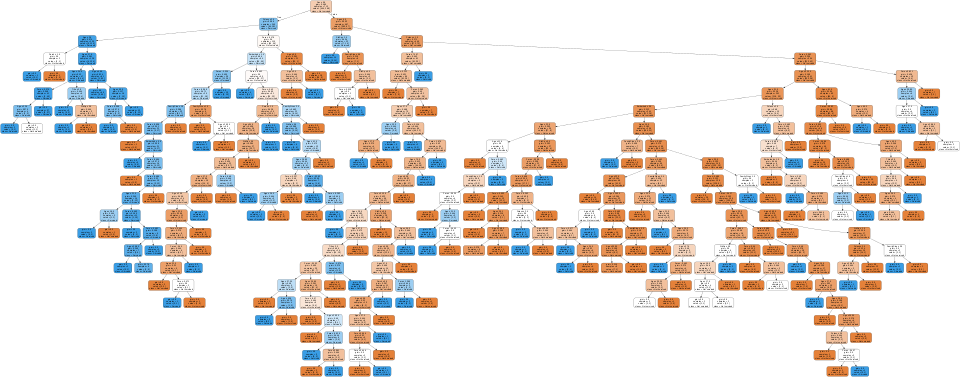

In [0]:
dot_data = StringIO()
export_graphviz(
    tree, 
    out_file=dot_data, 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    feature_names=titanic_feature_names, 
    class_names=['Not survived','Survived'] 
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('titanic.png')
graph.set_size('"10,7!"') 
Image(graph.create_png())

#### Logistic regression

In [42]:
logmodel = LogisticRegression()

logmodel.fit(train_X, train_y)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred = logmodel.predict(test_X)

In [44]:
log_score = accuracy_score(test_y, y_pred)
log_score

0.7877094972067039

#### SVM model

In [45]:
svclassifier = SVC(kernel='linear') 

svclassifier.fit(train_X, train_y)  
pred_y = svclassifier.predict(test_X)  

In [46]:
svm_score = accuracy_score(test_y, pred_y)
svm_score

0.7821229050279329

#### Gaussian Naive Bayes

In [48]:
gaussian_model = GaussianNB() 

gaussian_model.fit(train_X, train_y)  
Y_pred = gaussian_model.predict(test_X)  

In [49]:
acc_gaussian = accuracy_score(test_y, Y_pred)
acc_gaussian

0.7877094972067039

#### KNN

In [50]:
Knn = KNeighborsClassifier(n_neighbors = 3) 

Knn.fit(train_X, train_y)  
knn_pred = Knn.predict(test_X)  

In [51]:
acc_knn = accuracy_score(test_y, knn_pred)
acc_knn

0.7653631284916201

#### Random forest

In [52]:
random_for = RandomForestClassifier(n_estimators=100)

random_for.fit(train_X, train_y)
rand_pred = random_for.predict(test_X)

In [53]:
acc_RF = accuracy_score(test_y, rand_pred)
acc_RF

0.8435754189944135

#### Which one is the best Model ?

In [82]:
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression','Support Vector Machines', 'Naive Bayes',
              'KNN','Random Forest'],
    'Score': [precision, log_score, svm_score, 
              acc_gaussian, acc_knn, acc_RF]})

models = results.sort_values(by='Score', ascending=False)
models = models.set_index('Score')
models.head(6)

,Model
Score,
0.843575,Random Forest
0.787709,Decision Tree
0.787709,Logistic Regression
0.787709,Naive Bayes
0.782123,Support Vector Machines
0.765363,KNN


We see that the best accuracy is that one given by the Random Forest Classifier.

### Model evaluation

#### GridSearch

GridSearchCV works by training our model multiple times on a range of parameters that we specify. That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [66]:
RF = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [200, 500],
    'min_samples_split' : [8, 10, 12],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')

grid.fit(train_X, train_y)

grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [67]:
grid.best_score_

0.8356741573033708

In [81]:
grid.score(train_X, train_y)

0.8553370786516854

In [69]:
grid.score(test_X, test_y)

0.8212290502793296

In [78]:
pred2 = grid.predict(test_X)
pred2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

#### Confusion Matrix

In [79]:
cm2 = confusion_matrix(test_y, pred2)
print(cm2)

rfgs_score = accuracy_score(test_y, pred2)
print('Accuracy:', rfgs_score)

[[92 13]
 [19 55]]
Accuracy: 0.8212290502793296


We see the best accuracy 0.82 on the test data.

The first row is about the not survived predictions: 92 passengers were correctly classified as not survived (true negatives) and 13 where wrongly classified as not survived (false positives).

The second row is about the survived predictions: 19 passengers where wrongly classified as survived (false negatives) and 55 where correctly classified as survived (true positives).


In [80]:
print(classification_report(test_y, pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



The classification report tell us about precision, reccall and f-score.


### Conclusion

In this project we started with the data exploration. We checked about missing data, analyzed the data and do visualizations. It requires made the following tasks: computation the missing values, converted features into numeric ones and finally created a few new features. Next we started training 6 different machine learning models,  we choosed one of them (random forest) and applied further evaluation for it. 

By using Random Forest classifier we got best score/accuracy of 0.84 and by using Grid Search the accurcy was 0.85 on the train data while on the test data the accurcy was 0.82. 
